# Lesson 1: The Python language (workbook)

Import statements: run these first.

In [1]:
# Python standard library
import json
import math

# Scientific Python ecosystem
import numpy as np
import matplotlib.pyplot as plt

# Particle physics tools
from hepunits import GeV
from particle import Particle
import vector
from hist import Hist

Links to documentation for each library:

* [Python standard library](https://docs.python.org/3/library/index.html): built-in functionality
* [NumPy](https://numpy.org/): arrays and array-oriented programming
* [Matplotlib](https://matplotlib.org/): making plots
* [Vector](https://vector.readthedocs.io/): 2D, 3D, 4D vector calculations and coordinate transformations
* [hist](https://hist.readthedocs.io/): histogramming with histogram objects
* [Particle](https://github.com/scikit-hep/particle?tab=readme-ov-file#readme): particle properties from the PDG
* [hepunits](https://github.com/scikit-hep/hepunits?tab=readme-ov-file#readme): unit conversions

Use these empty cells to try things on your own.

We'll be using these equations a lot:

$$p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$$

$$m = \sqrt{E^2 - p^2}$$

**Mini-quiz 1:** Fix the mistake!

In [3]:
E = 68.1289790
px = -17.945541
py = 13.1652603
pz = 64.3908386

In [4]:
m = (E**2 - px**2 + py**2 + pz**2)**(1/2)
m

92.94632597460625

`m` should be `0.10565709514578395`. What was the mistake?

In [5]:
# Mini-quiz solution:

m = (E**2 - (px**2 + py**2 + pz**2))**(1/2)
m

0.10565709514578395

What can you do with this `muon` object?

In [ ]:
muon = Particle.from_name("mu+")
muon

In [ ]:
?muon

In [ ]:
dir(muon)

**Mini-quiz 2:** Before you run the following, what will it do?

```python
type(type(1)("2"))
```

In [6]:
# Mini-quiz solution:
# Breakdown:

type(1) # Output: int

type(int("2")) == (type(type(1)("2")))

True

**Mini-quiz 3:** Write two expressions to show that booleans in Python are integers and booleans in NumPy are not.

In [7]:
import numpy as np

print(f"{isinstance(True, int)=}")
print(f"{(True + True)=}")

print(f"{isinstance(np.bool_(True), int)=}")

isinstance(True, int)=True
(True + True)=2
isinstance(np.bool_(True), int)=False


**Mini-quiz 4:** Before you run it, what will the following do?

```python
some_list[2:8][3]
```

In [8]:
some_list = [0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 'mixed types']
some_dict = {'one': 1.1, 'two': 22222, 'three': 3.3, 123: 'mixed types'}

In [9]:
some_list = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

# 1. Get the slice, then 2. Get the 4th element (index 3)
result = some_list[2:8][3]

print(f"The result is: {result}")

The result is: 5.5


Starting from the observed electrons and muons, we reconstruct unobserved particles by adding energy and momentum.

<br>

<center>
<img src="img/higgs-to-four-leptons-diagram.png" width="60%">
</center>

In [ ]:
particles = [
    {"type": "electron", "E": 171.848714, "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "charge": 1,},
    {"type": "electron", "E": 138.501266, "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "charge": -1,},
    {"type": "muon", "E": 68.1289790, "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "charge": 1,},
    {"type": "muon", "E": 18.8320473, "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "charge": -1,},
]

In [ ]:
def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

In [ ]:
z1 = particle_decay("Z boson", particles[0], particles[1])
z1

In [ ]:
z2 = particle_decay("Z boson", particles[2], particles[3])
z2

In [ ]:
higgs = particle_decay("Higgs boson", z1, z2)
higgs

**Mini-quiz 5:** Define the `particle_mass` function and compute the mass of `z1`, `z2`, and `higgs`.

| input | expected output |
|:--|:--|
| `particle_mass(z1)` | `90.28562890933117` |
| `particle_mass(z2)` | `22.878929369436445` |
| `particle_mass(higgs)` | `125.23413366311769` |

In [10]:
def particle_mass(particle):
    """Computes the invariant mass of a particle dictionary."""
    e_sq = particle["E"]**2
    p_sq = particle["px"]**2 + particle["py"]**2 + particle["pz"]**2
    return math.sqrt(e_sq - p_sq)

In [11]:
import math
particles = [
    {"type": "electron", "E": 171.848714, "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "charge": 1,},
    {"type": "electron", "E": 138.501266, "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "charge": -1,},
    {"type": "muon", "E": 68.1289790, "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "charge": 1,},
    {"type": "muon", "E": 18.8320473, "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "charge": -1,},
]

def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

z1 = particle_decay("Z boson", particles[0], particles[1])
z2 = particle_decay("Z boson", particles[2], particles[3])
higgs = particle_decay("Higgs boson", z1, z2)


m_z1 = particle_mass(z1)
m_z2 = particle_mass(z2)
m_higgs = particle_mass(higgs)

print(f"Masses: Z1={m_z1:.2f}, Z2={m_z2:.2f}, Higgs={m_higgs:.2f}")

Masses: Z1=90.29, Z2=22.88, Higgs=125.23


In [15]:
dataset = json.load(open("../data/SMHiggsToZZTo4L.json"))

For the rest of this lesson and your upcoming project, here's the meaning of each field. (We only use a few of them.)

 * **run** (int): unique identifier for a data-taking period of the LHC. This is simulated data, so the run number is 1.
 * **luminosityBlock** (int): unique identifier for a period of relatively stable conditions within a run.
 * **event** (int): unique identifier for one crossing of LHC bunches.
 * **PV** (dict): primary vertex of the collision.
   - **x** (float): $x$-position in cm.
   - **y** (float): $y$-position in cm.
   - **z** (float): $z$-position (along the beamline) in cm.
 * **electron** (list of dict): list of electrons (may be empty).
   - **pt** (float): $p_T$ component of momentum transverse to the beamline in GeV/$c$.
   - **eta** (float): $\eta$ pseudorapidity (roughly, polar angle with respect to the beamline), unitless.
   - **phi** (float): $\phi$ azimuthal angle (in the plane that is perpendicular to the beamline), unitless.
   - **mass** (float): measured mass of the particle in GeV/$c^2$.
   - **charge** (int): either `+1` or `-1`, unitless.
   - **pfRelIso03_all** (float): quantity that specifies how isolated this electron is from the rest of the particles in the event, unitless.
   - **dxy** (float): distance of closest approach to the primary vertex in the plane that is perpendicular to the beamline, in cm.
   - **dxyErr** (float): uncertainty in the **dxy** measurement.
   - **dz** (float): distance of closest approach to the primary vertex in $z$, along the beamline, in cm.
   - **dzErr** (float): uncertainty in the **dz** measurement.
 * **muon** (list of dict): list of muons (may be empty) with the same dict fields as **electron**.
 * **MET** (dict): missing transverse energy (in the plane perpendicular to the beamline).
   - **pt** (float): $p_T$ magnitude, in GeV/$c$.
   - **phi** (float): $\phi$ aximuthal angle, unitless.

And here are some coordinate transformations:

- $p_x = p_T \cos\phi \cosh\eta$
- $p_y = p_T \sin\phi \cosh\eta$
- $p_z = p_T \sinh\eta$
- $\displaystyle E = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2 + m^2}$

In [13]:
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

**Mini-quiz 6:** Make a histogram of electron $p_T$.

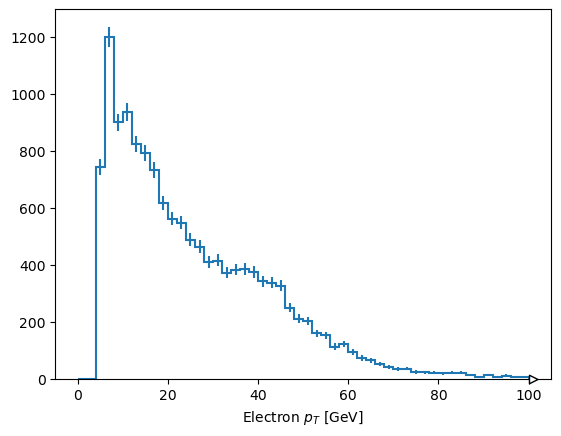

In [16]:
import json
import matplotlib.pyplot as plt
from hist import Hist

pts = [el["pt"] for ev in dataset for el in ev["electron"]]

h = Hist.new.Reg(50, 0, 100, name="Electron $p_T$ [GeV]").Double()
h.fill(pts)
h.plot1d()
plt.show()